In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel('train_agriculture.xlsx')
df_test=pd.read_excel('test_agriculture.xlsx')


In [3]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
df_train.shape # In training data set total 4599 rows and 10 column

(4599, 10)

In [6]:
df_test.shape  # In testing dataset total 1199 rows and 9 column

(1199, 9)

In [7]:
df_train.dtypes 

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

There is one column with catogirical data remaining data are numerical

In [8]:
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

There is one column with catogirical data remaining data are numerical

In [9]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There is total 442 null value in Number_Weeks_Used  

In [10]:
#Replacing null value with mean of column
imp=SimpleImputer(strategy='mean')
df_train['Number_Weeks_Used']=imp.fit_transform(df_train['Number_Weeks_Used'].values.reshape(-1,1))

In [11]:
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [13]:
#Replacing null value with mean of column
imp=SimpleImputer(strategy='mean')
df_test['Number_Weeks_Used']=imp.fit_transform(df_test['Number_Weeks_Used'].values.reshape(-1,1))

In [14]:
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

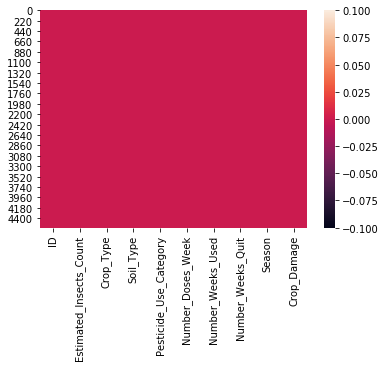

In [15]:
sns.heatmap(df_train.isnull())

by seeing this we can say there is no null value in data set

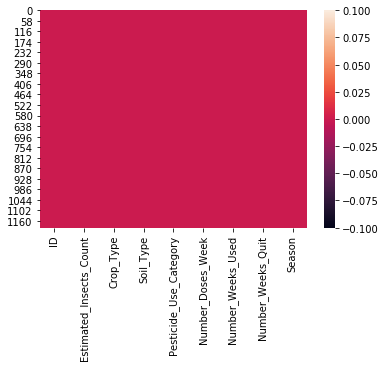

In [16]:
sns.heatmap(df_test.isnull())

there is no null value in testing dataset

In [17]:
df_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [18]:
df_test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [19]:
df_train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [20]:
lst=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit', 'Season', 'Crop_Damage']
for i in lst:
    print(i,'\n',df_train[i].value_counts())
    
    

Estimated_Insects_Count 
 1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64
Crop_Type 
 0    3565
1    1034
Name: Crop_Type, dtype: int64
Soil_Type 
 0    2407
1    2192
Name: Soil_Type, dtype: int64
Pesticide_Use_Category 
 2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64
Number_Doses_Week 
 20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64
Number_Weeks_Used 
 28.891027    442
20.000000    209
30.000000    194
25.000000    165
40.000000    133
            ... 
62.000000      5
59.000000      5
65.000000      3
66.000000      3
64.000000      1
Name: Number_Weeks_Used, Length: 64, dtype: int64
Number_Weeks_Quit 
 0     149

Checking Unique values for all column

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [22]:
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


if mean is greater than median then that attibute is right skewed such columns are Estimated_Insects_Count,Number_Doses_Week

IF difference between 75% and max is more then outliers present in datacolumn Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used

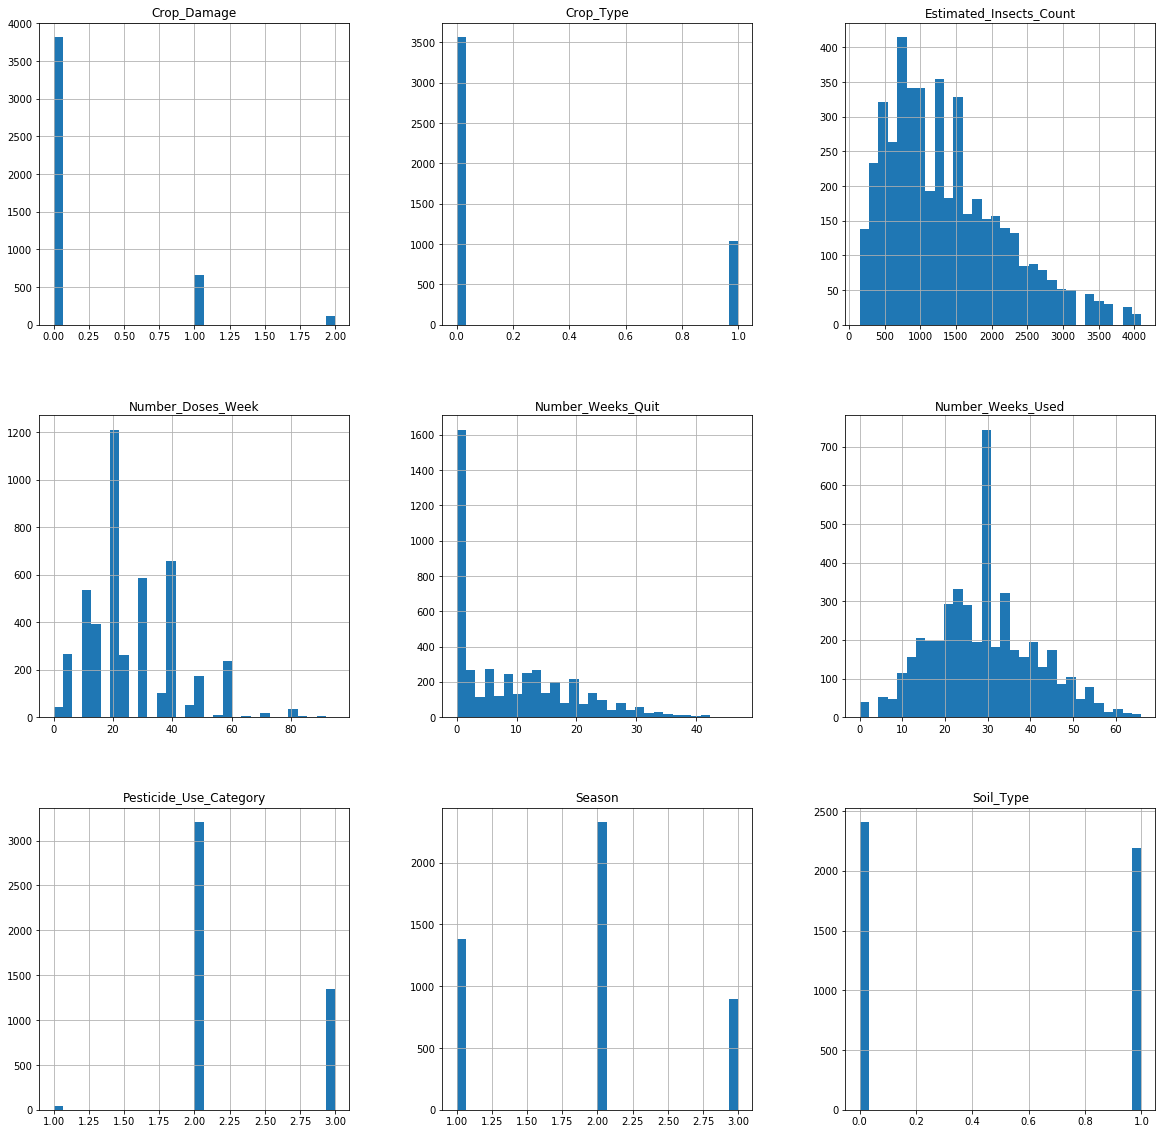

In [23]:
df_train.hist(bins = 30, figsize=(20,20));

In [24]:
#Conversion of catogirical data to numerical
le=LabelEncoder()
df_train['ID']=le.fit_transform(df_train['ID'])
df_test['ID']=le.fit_transform(df_test['ID'])

In [25]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0
1,1,209,1,0,1,0,0.0,0,2,1
2,2,257,1,0,1,0,0.0,0,2,1
3,3,257,1,1,1,0,0.0,0,2,1
4,4,342,1,0,1,0,0.0,0,2,1


In [26]:
cor=df_train.corr()

In [27]:
cor

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,1.000000,0.055384,-0.124446,0.126621,-0.296851,0.031224,-0.096131,0.244521,-0.019987,-0.092715
Estimated_Insects_Count,0.055384,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.124446,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,0.126621,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.296851,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,0.031224,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,-0.096131,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.244521,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.019987,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,-0.092715,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


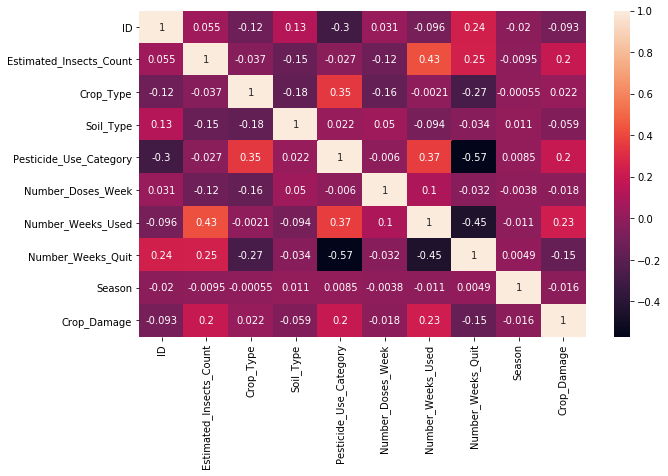

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

By observing above heatmap we can say all attribute all normally correlated with target attribute Crop_Damage

# Data Visualization

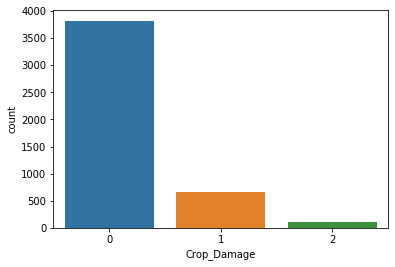

In [29]:
sns.countplot(df_train['Crop_Damage'])

0-> is maximum so 3820 crop are alive 

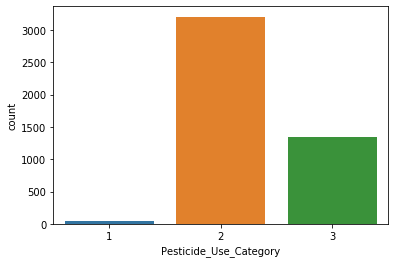

In [30]:
sns.countplot(df_train['Pesticide_Use_Category'])

We can say most of pesticide is previously used

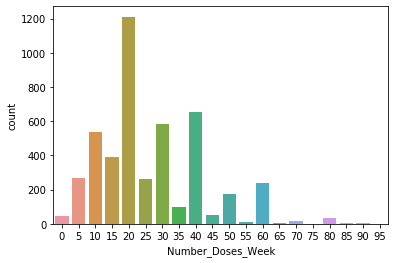

In [31]:
sns.countplot(df_train['Number_Doses_Week'])

20 doses is used in most of weeks

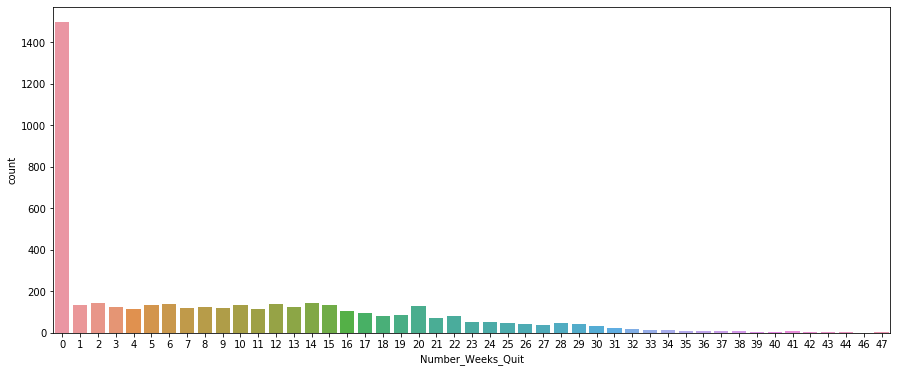

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Number_Weeks_Quit'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

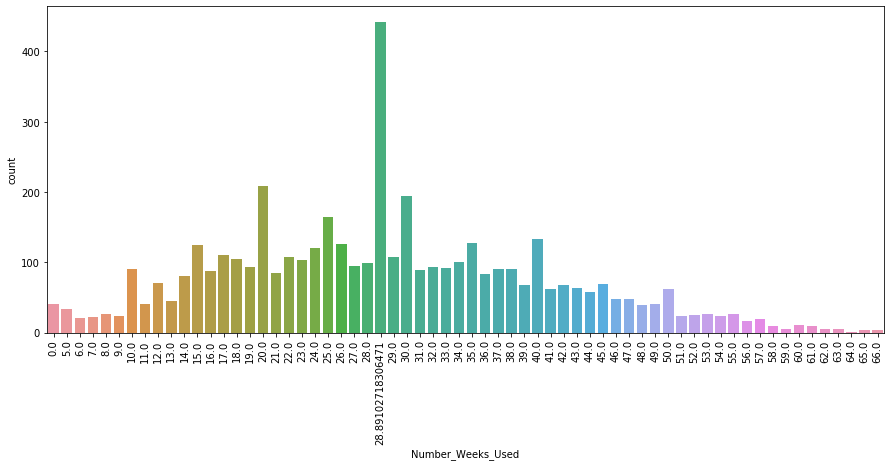

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Number_Weeks_Used'])
plt.xticks(rotation=90)

28.89 is most number of time used

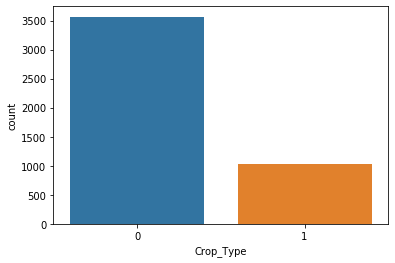

In [34]:
sns.countplot(df_train['Crop_Type'])

most of crops are 0 catogory

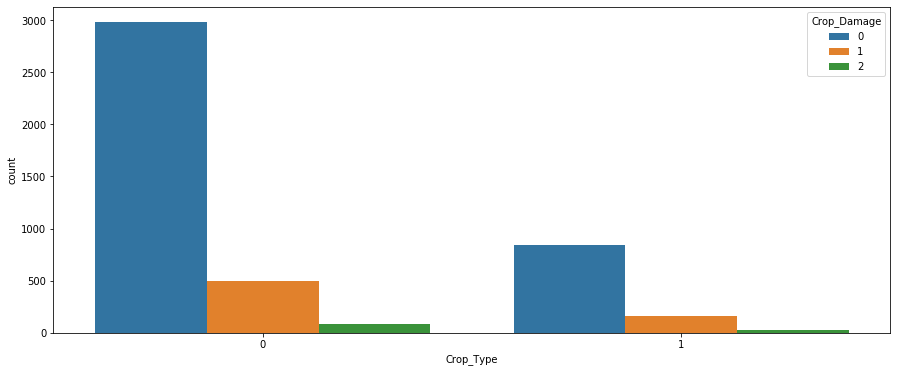

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Crop_Type'],hue=df_train['Crop_Damage'])

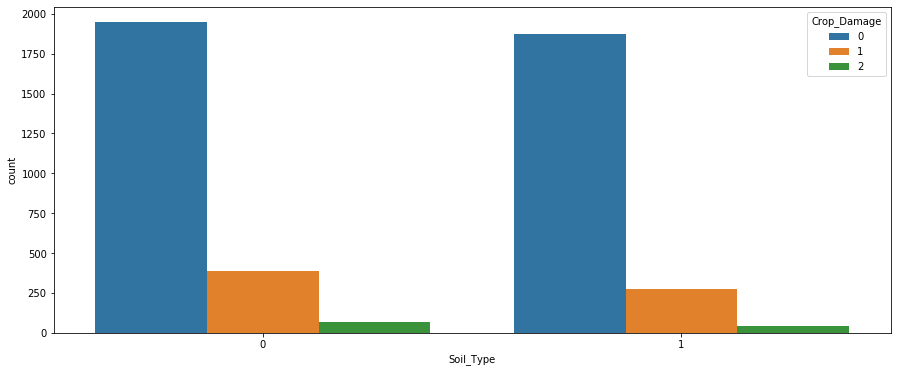

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Soil_Type'],hue=df_train['Crop_Damage'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text xticklabel objects>)

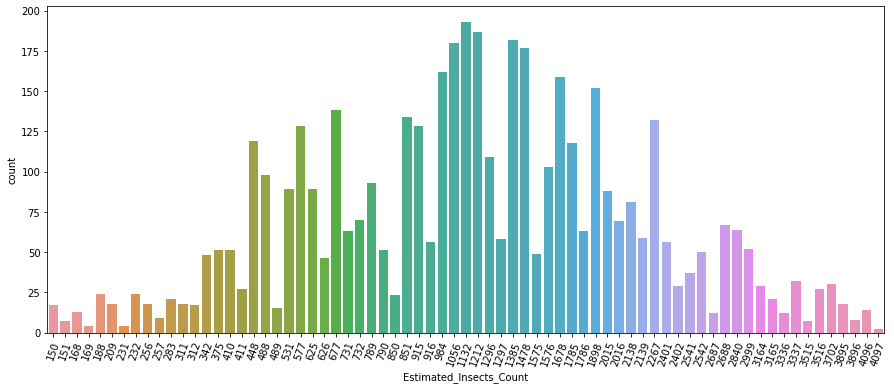

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Estimated_Insects_Count'])
plt.xticks(rotation=70)

1132 is highest estimated insects count

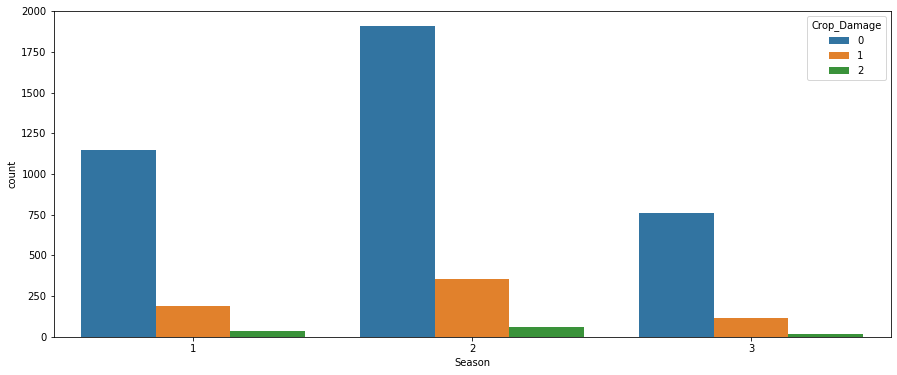

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Season'],hue=df_train['Crop_Damage'])

more crop are alive in season 2

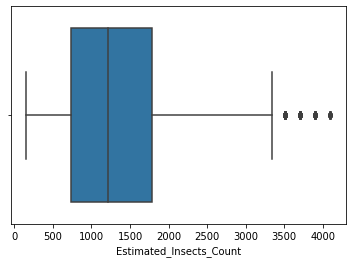

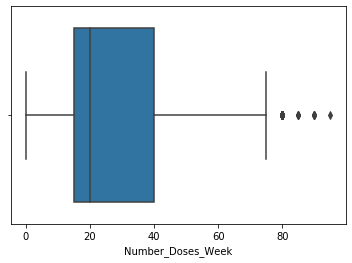

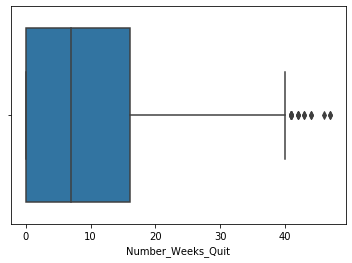

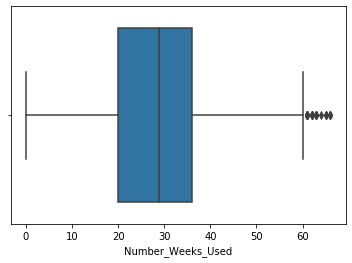

In [39]:
#Checking for oultiers
lst=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used']
for i in lst:
    plt.figure(i)
    sns.boxplot(df_train[i])


Observations:Outliers are present 

In [40]:
#Checking the Skewness
df_train.skew()

ID                         0.000000
Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [41]:
df_test.skew()

ID                         0.000000
Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

For both training and testing dataset no skewness is present

In [42]:
#Removing the outliers
z=np.abs(zscore(df_train))
z

array([[1.73167423, 1.44286807, 1.85681868, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.730921  , 1.41708065, 1.85681868, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.73016778, 1.35813798, 1.85681868, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.73016778, 1.11008649, 0.53855555, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.730921  , 1.11008649, 0.53855555, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.73167423, 1.11008649, 0.53855555, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [43]:
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [44]:
df_train_new=df_train[(z<3).all(axis=1)]
df_train_new.shape

(4370, 10)

In [45]:
df_train.shape

(4599, 10)

In [46]:
#Removing outliers from testing dataset
z=np.abs(zscore(df_test))
z

array([[1.73060683e+00, 1.30318366e+00, 2.03615391e+00, ...,
        5.85986262e-16, 7.96003797e-01, 1.72804130e-01],
       [1.72771767e+00, 1.04035366e+00, 2.03615391e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       [1.72482851e+00, 7.84627185e-01, 2.03615391e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       ...,
       [1.72482851e+00, 1.85564227e-01, 4.91122009e-01, ...,
        1.32227276e+00, 1.79995135e+00, 1.28629553e+00],
       [1.72771767e+00, 9.08507165e-02, 4.91122009e-01, ...,
        4.92072401e-01, 2.31665722e-01, 1.28629553e+00],
       [1.73060683e+00, 9.08507165e-02, 4.91122009e-01, ...,
        5.85986262e-16, 1.46134850e+00, 1.63190379e+00]])

In [47]:
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 5, 5], dtype=int64))


In [48]:
df_test_new=df_test[(z<3).all(axis=1)]
df_test_new.shape

(1160, 9)

In [49]:
df_test.shape

(1199, 9)

In [50]:
df_train=df_train_new
df_test=df_test_new

EDA is Completed

# Model Deployment

In [51]:
x=df_train.drop('Crop_Damage',axis=1)
y=df_train['Crop_Damage']

In [52]:
x

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0.000000,0,1
1,1,209,1,0,1,0,0.000000,0,2
2,2,257,1,0,1,0,0.000000,0,2
3,3,257,1,1,1,0,0.000000,0,2
4,4,342,1,0,1,0,0.000000,0,2
...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,28.891027,1,1
4595,4595,2139,0,1,2,30,47.000000,2,1
4596,4596,2267,0,1,2,10,7.000000,27,2
4597,4597,2267,0,1,2,10,20.000000,24,2


In [53]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [55]:
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(3059, 9) 	 (1311, 9)
(3059,) 	 (1311,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [57]:
lg=LogisticRegression()
svc=SVC()

In [58]:
model=[lg,svc,KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB()]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,pred))
    print('Confusion Metrix\n',confusion_matrix(y_test,pred))
    print('Classification report\n',classification_report(y_test,pred))
    print('***********************************************************************************')
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score 0.855072463768116
Confusion Metrix
 [[1108   22]
 [ 168   13]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1130
           1       0.37      0.07      0.12       181

    accuracy                           0.86      1311
   macro avg       0.62      0.53      0.52      1311
weighted avg       0.80      0.86      0.81      1311

***********************************************************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_ite

In [59]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [60]:
model=[RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,pred))
    print('Confusion Metrix\n',confusion_matrix(y_test,pred))
    print('Classification report\n',classification_report(y_test,pred))
    print('***********************************************************************************')
    print('\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy score 0.8558352402745996
Confusion Metrix
 [[1080   50]
 [ 139   42]]
Classification report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1130
           1       0.46      0.23      0.31       181

    accuracy                           0.86      1311
   macro avg       0.67      0.59      0.61      1311
weighted avg       0.83      0.86      0.84      1311

************************

In [61]:
from sklearn.model_selection import cross_val_score
svcscore=cross_val_score(svc,x,y,cv=4)
print('cross validation=',svcscore)
print(svcscore.mean(),svcscore.std())

cross validation= [0.57639524 0.85361391 0.8543956  0.85347985]
0.7844711517515727 0.12013319127283646


In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.12758038, 0.54433139, 0.11943737, ..., 0.08921537, 0.07699732,
       0.19871583])

In [64]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

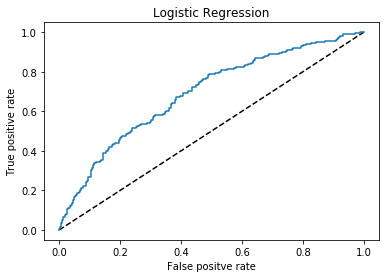

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positve rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

Observations:
    SVC is best model so we predict output for testing dataset by svc 

In [66]:
predicted=svc.predict(df_test)

In [67]:
print(predicted)

[0 0 0 ... 0 0 0]


In [68]:
from sklearn.externals import joblib
joblib.dump(svc,'svc_AgriDataset.pkl')

['svc_AgriDataset.pkl']